## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [5]:
"""
Compile 模型
"""

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 3s 55us/step - loss: 2.2569 - accuracy: 0.1473 - val_loss: 2.2062 - val_accuracy: 0.1840
Epoch 2/500
50000/50000 [==============================] - 2s 47us/step - loss: 2.1692 - accuracy: 0.2208 - val_loss: 2.1379 - val_accuracy: 0.2462
Epoch 3/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.1101 - accuracy: 0.2620 - val_loss: 2.0856 - val_accuracy: 0.2798
Epoch 4/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.0635 - accuracy: 0.2842 - val_loss: 2.0440 - val_accuracy: 0.2978
Epoch 5/500
50000/50000 [==============================] - 2s 46us/step - loss: 2.0264 - accuracy: 0.2982 - val_loss: 2.0115 - val_accuracy: 0.3058
Epoch 6/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.9959 - accuracy: 0.3086 - val_loss: 1.9828 - val_accuracy: 0.3191
Epoch 7/500
50000/50000 [==============================] - 2s 

Epoch 56/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6628 - accuracy: 0.4222 - val_loss: 1.6723 - val_accuracy: 0.4198
Epoch 57/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6600 - accuracy: 0.4215 - val_loss: 1.6635 - val_accuracy: 0.4204
Epoch 58/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6566 - accuracy: 0.4235 - val_loss: 1.6615 - val_accuracy: 0.4236
Epoch 59/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6539 - accuracy: 0.4242 - val_loss: 1.6597 - val_accuracy: 0.4251
Epoch 60/500
50000/50000 [==============================] - 2s 48us/step - loss: 1.6506 - accuracy: 0.4259 - val_loss: 1.6571 - val_accuracy: 0.4258
Epoch 61/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6478 - accuracy: 0.4264 - val_loss: 1.6544 - val_accuracy: 0.4271
Epoch 62/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.6448 - accuracy: 0.4280

Epoch 111/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.5293 - accuracy: 0.4660 - val_loss: 1.5552 - val_accuracy: 0.4540
Epoch 112/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5275 - accuracy: 0.4668 - val_loss: 1.5487 - val_accuracy: 0.4582
Epoch 113/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5255 - accuracy: 0.4683 - val_loss: 1.5468 - val_accuracy: 0.4579
Epoch 114/500
50000/50000 [==============================] - 2s 45us/step - loss: 1.5235 - accuracy: 0.4700 - val_loss: 1.5445 - val_accuracy: 0.4591
Epoch 115/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5214 - accuracy: 0.4696 - val_loss: 1.5436 - val_accuracy: 0.4609
Epoch 116/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.5195 - accuracy: 0.4706 - val_loss: 1.5414 - val_accuracy: 0.4613
Epoch 117/500
50000/50000 [==============================] - 2s 47us/step - loss: 1.5179 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 1.4373 - accuracy: 0.4992 - val_loss: 1.4852 - val_accuracy: 0.4736
Epoch 166/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4356 - accuracy: 0.4985 - val_loss: 1.4804 - val_accuracy: 0.4783
Epoch 167/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4340 - accuracy: 0.5000 - val_loss: 1.4890 - val_accuracy: 0.4754
Epoch 168/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4331 - accuracy: 0.4990 - val_loss: 1.4788 - val_accuracy: 0.4808
Epoch 169/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4307 - accuracy: 0.5003 - val_loss: 1.4904 - val_accuracy: 0.4693
Epoch 170/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4296 - accuracy: 0.5009 - val_loss: 1.4775 - val_accuracy: 0.4795
Epoch 171/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.4279 - accuracy: 0.5018 - val_

Epoch 220/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3580 - accuracy: 0.5253 - val_loss: 1.4310 - val_accuracy: 0.4924
Epoch 221/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3570 - accuracy: 0.5265 - val_loss: 1.4343 - val_accuracy: 0.4922
Epoch 222/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3552 - accuracy: 0.5271 - val_loss: 1.4362 - val_accuracy: 0.4908
Epoch 223/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3539 - accuracy: 0.5269 - val_loss: 1.4446 - val_accuracy: 0.4862
Epoch 224/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3531 - accuracy: 0.5272 - val_loss: 1.4318 - val_accuracy: 0.4916
Epoch 225/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3515 - accuracy: 0.5283 - val_loss: 1.4322 - val_accuracy: 0.4956
Epoch 226/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.3495 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 1.2902 - accuracy: 0.5486 - val_loss: 1.4053 - val_accuracy: 0.5007
Epoch 275/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2884 - accuracy: 0.5495 - val_loss: 1.3961 - val_accuracy: 0.5063
Epoch 276/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2874 - accuracy: 0.5501 - val_loss: 1.3932 - val_accuracy: 0.5044
Epoch 277/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2864 - accuracy: 0.5503 - val_loss: 1.3950 - val_accuracy: 0.5046
Epoch 278/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2848 - accuracy: 0.5517 - val_loss: 1.3912 - val_accuracy: 0.5075
Epoch 279/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2842 - accuracy: 0.5504 - val_loss: 1.3931 - val_accuracy: 0.5056
Epoch 280/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2821 - accuracy: 0.5515 - val_

Epoch 329/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2264 - accuracy: 0.5721 - val_loss: 1.3808 - val_accuracy: 0.5085
Epoch 330/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2261 - accuracy: 0.5721 - val_loss: 1.3788 - val_accuracy: 0.5099
Epoch 331/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2249 - accuracy: 0.5716 - val_loss: 1.3791 - val_accuracy: 0.5069
Epoch 332/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2234 - accuracy: 0.5728 - val_loss: 1.3676 - val_accuracy: 0.5120
Epoch 333/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2226 - accuracy: 0.5732 - val_loss: 1.3795 - val_accuracy: 0.5080
Epoch 334/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2211 - accuracy: 0.5736 - val_loss: 1.3688 - val_accuracy: 0.5134
Epoch 335/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.2201 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 1.1683 - accuracy: 0.5921 - val_loss: 1.3883 - val_accuracy: 0.5086
Epoch 384/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1677 - accuracy: 0.5932 - val_loss: 1.3817 - val_accuracy: 0.5119
Epoch 385/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1670 - accuracy: 0.5948 - val_loss: 1.3744 - val_accuracy: 0.5147
Epoch 386/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1655 - accuracy: 0.5933 - val_loss: 1.3632 - val_accuracy: 0.5135
Epoch 387/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1641 - accuracy: 0.5951 - val_loss: 1.3516 - val_accuracy: 0.5179
Epoch 388/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1645 - accuracy: 0.5946 - val_loss: 1.3718 - val_accuracy: 0.5103
Epoch 389/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1635 - accuracy: 0.5952 - val_

Epoch 438/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1130 - accuracy: 0.6142 - val_loss: 1.3377 - val_accuracy: 0.5228
Epoch 439/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1102 - accuracy: 0.6146 - val_loss: 1.3391 - val_accuracy: 0.5229
Epoch 440/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1103 - accuracy: 0.6145 - val_loss: 1.3550 - val_accuracy: 0.5191
Epoch 441/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1087 - accuracy: 0.6143 - val_loss: 1.3413 - val_accuracy: 0.5245
Epoch 442/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1100 - accuracy: 0.6145 - val_loss: 1.3570 - val_accuracy: 0.5212
Epoch 443/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1075 - accuracy: 0.6165 - val_loss: 1.3441 - val_accuracy: 0.5193
Epoch 444/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.1060 - accuracy:

50000/50000 [==============================] - 2s 46us/step - loss: 1.0595 - accuracy: 0.6326 - val_loss: 1.3613 - val_accuracy: 0.5165
Epoch 493/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0571 - accuracy: 0.6329 - val_loss: 1.3660 - val_accuracy: 0.5183
Epoch 494/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0549 - accuracy: 0.6344 - val_loss: 1.3591 - val_accuracy: 0.5223
Epoch 495/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0564 - accuracy: 0.6331 - val_loss: 1.3477 - val_accuracy: 0.5230
Epoch 496/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0527 - accuracy: 0.6349 - val_loss: 1.3592 - val_accuracy: 0.5199
Epoch 497/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0537 - accuracy: 0.6349 - val_loss: 1.3389 - val_accuracy: 0.5261
Epoch 498/500
50000/50000 [==============================] - 2s 46us/step - loss: 1.0517 - accuracy: 0.6359 - val_

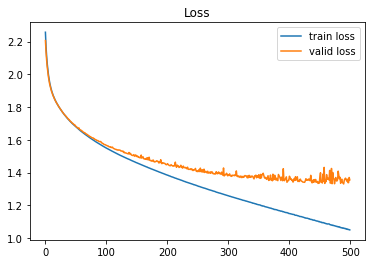

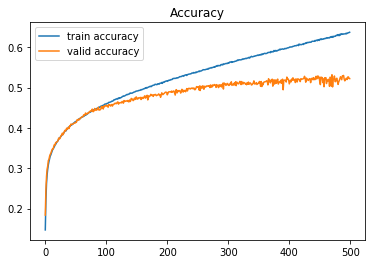

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()